In [31]:
import sys
sys.path.append('/global/u2/j/jianyao/PySM_public/')

In [32]:
from pysm.common import convert_units

In [51]:
import pysm3
import pysm3.units as u
from astropy.io import fits as fits
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean

%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore")

# Config

In [52]:
fres = np.array([2.3, 5, 23, 28, 33]); Nside = 64; nu0 = gmean(fres)

# Foregrounds

## IQU at 5 fres

https://github.com/galsci/pysm/blob/f36aeaef51e5d449fb0bf20b40e4270d6867e14f/pysm3/data/presets.cfg

[s0]

class = "PowerLaw"

map_I = "pysm_2/synch_t_new.fits"

map_Q = "pysm_2/synch_q_new.fits"

map_U = "pysm_2/synch_u_new.fits"

unit_I = "uK_RJ"

unit_Q = "uK_RJ"

unit_U = "uK_RJ"

map_pl_index = -3

freq_ref_I = "408 MHz"

freq_ref_P = "23 GHz"


In [10]:
sky = pysm3.Sky(nside=Nside, preset_strings=["s0"])
maps_all = np.ones((len(fres), 3, 12*Nside**2)); maps_RJ = np.ones((len(fres), 3, 12*Nside**2))
for i in range(len(fres)):
    maps = sky.get_emission([fres[i]] * u.GHz)
    maps_RJ[i] = maps
    maps_all[i] = maps.to(u.uK_CMB, equivalencies=u.cmb_equivalencies(fres[i]*u.GHz))

In [63]:
IQU_0 = sky.get_emission([nu0] * u.GHz)

P = np.sqrt(IQU_0[1]**2 + IQU_0[2]**2)
np.save('/global/cscratch1/sd/jianyao/CBASS/Foreground/P_nu0_s0_64_uK_RJ.npy',np.array(P))

In [11]:
maps_RJ.shape

(5, 3, 49152)

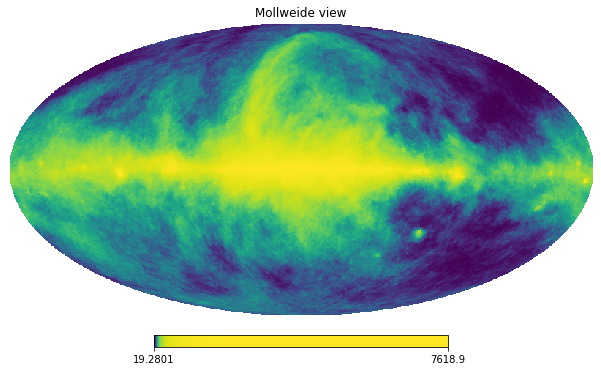

In [12]:
hp.mollview(maps_RJ[2][0], norm = 'hist')

In [58]:
np.save('/global/cscratch1/sd/jianyao/CBASS/Foreground/5_fre_d0s0_128_uK_CMB.npy', maps_all)

In [13]:
np.save('/global/cscratch1/sd/jianyao/CBASS/Foreground/5_fre_s0_64_uK_RJ.npy', maps_RJ)

/global/homes/j/jianyao/myconda/lib/python3.6/site-packages/healpy/projaxes.py:543: UserWarning: 0.0 180.0 -180.0 180.0
  pmin / dtor, pmax / dtor, mmin / dtor, mmax / dtor
/global/homes/j/jianyao/myconda/lib/python3.6/site-packages/healpy/projaxes.py:658: UserWarning: The interval between parallels is 30 deg -0.00'.
  vdeg, varcmin
/global/homes/j/jianyao/myconda/lib/python3.6/site-packages/healpy/projaxes.py:666: UserWarning: The interval between meridians is 30 deg -0.00'.
  vdeg, varcmin


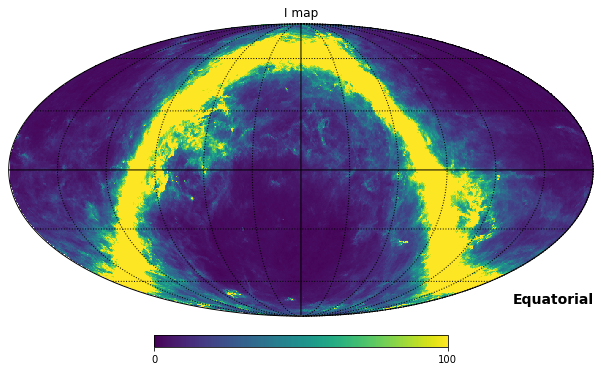

In [14]:
hp.mollview(map_100GHz[0], min=0, max=1e2, title="I map", coord = ['G', 'C'])
hp.graticule()

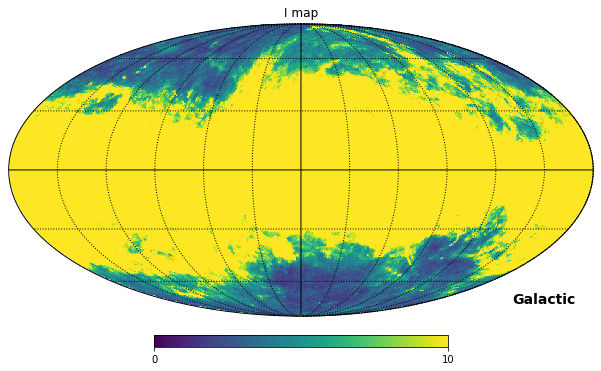

In [18]:
hp.mollview(map_100GHz[0], min=0, max=1e1, title="I map", coord = ['G'])
hp.graticule()

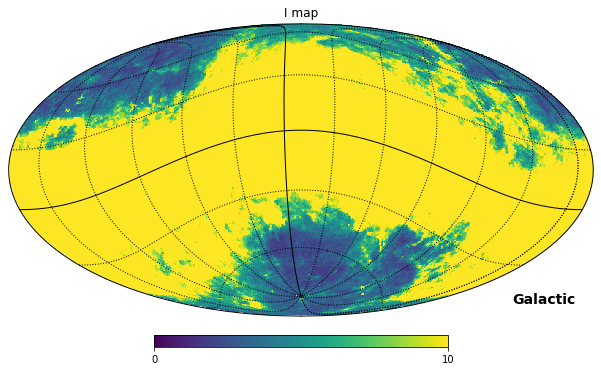

In [19]:
hp.mollview(map_100GHz[0], min=0, max=1e1, title="I map", coord = ['G'],rot=[-10, -20])
hp.graticule()

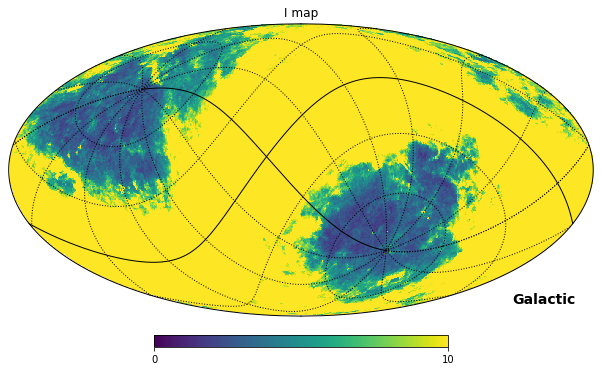

In [17]:
hp.mollview(map_100GHz[0], min=0, max=1e1, title="I map", coord = ['G'],rot=[-10, -20, 45])
hp.graticule()

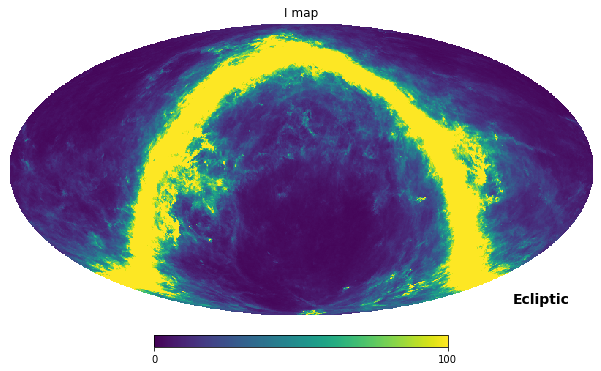

In [13]:
hp.mollview(map_100GHz[0], min=0, max=1e2, title="I map", coord = ['G','E'])

# Noise

In [123]:
spass_noise = fits.open('//global/cscratch1/sd/jianyao/CBASS/Noise/spass_dr1_1902_healpix_Tb_sens.fits', field = None, h = True)

In [124]:
spass_noise.info()

Filename: //global/cscratch1/sd/jianyao/CBASS/Noise/spass_dr1_1902_healpix_Tb_sens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     44   12288R x 1C   [1024E]   


In [126]:
spass_noise_map = hp.read_map(spass_noise)

In [127]:
spass_noise_map

array([-2.00000003e+30, -2.00000003e+30, -2.00000003e+30, ...,
        2.39170203e-03,  2.00104131e-03,  2.39170203e-03])

In [129]:
spass_mask = np.ones(12*1024**2)
spass_mask[np.where(spass_noise_map < 0)] = 0

In [137]:
np.mean(spass_mask*spass_noise_map)

0.0011102376235148197

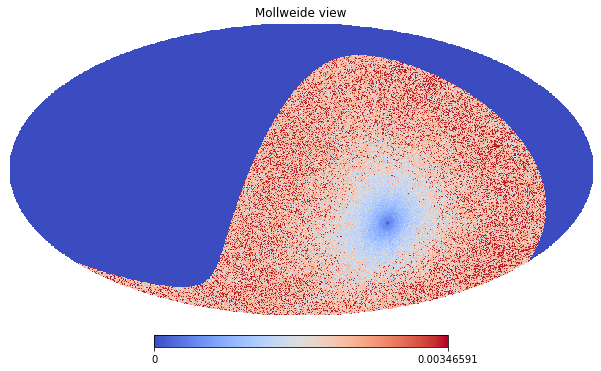

In [133]:
hp.mollview(spass_mask*spass_noise_map, cmap ='coolwarm')

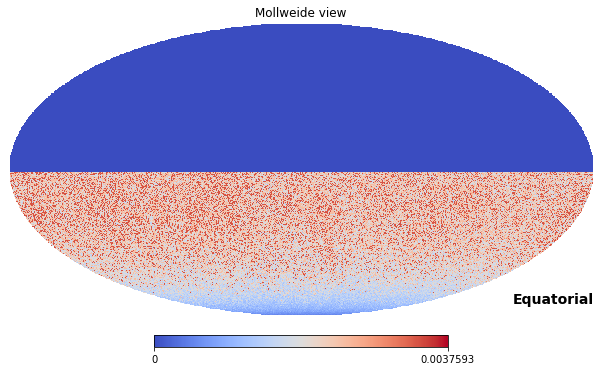

In [136]:
hp.mollview(spass_mask*spass_noise_map, cmap ='coolwarm', coord=['G','C'])

In [47]:
noise_path = '/global/cscratch1/sd/jianyao/CBASS/Noise/homo_noise'

## Typical sensitivity for SPASS CBASS K Ka 30 in $\mu K \_ RJ$

- SPASS 0.815 mk - 8.9arcmin -- 92 uK arcmin ; QU
- CBASS 0.30mk - 1 deg -- 5 $\mu K\_RJ$ arcmin; I
- WMAP K 7.7 uK - 1 deg -- 0.128 uK_RJ arcmin; I
- Planck 30 1.1 uk - 1deg -- 0.018 uK_RJ arcmin; I 

- S-PASS sensitivity in uK_thermo amin: 8070
- C-BASS sensitivity in uK_thermo amin: 4500
- WMAP-K sensitivity in uK_thermo amin: 435
- WMAP-Ka sensitivity in uK_thermo amin: 436
- Planck-30 sensitivity in uK_termo amin: 276

In [37]:
## from sigma_I to sigma_Q and sigma_U
# Sens_P = np.array((92, 5*np.sqrt(2), 0.128*np.sqrt(2), 0.128*np.sqrt(2), 0.018*np.sqrt(2)))

Sens_P_CMB = np.array((8070, 4500, 435, 436, 276))

## transform form $\mu K \_ CMB$ to $\mu K \_RJ$

In [38]:
Sens_P_RJ = Sens_P*convert_units("uK_CMB", "uK_RJ", fres)

In [39]:
Sens_P_RJ

array([8068.89702552, 4497.09426442,  429.10255891,  427.27401352,
        268.36317616])

## $\sigma$ map in CMB units for Q and U

In [40]:
Nside

64

In [41]:
npix = 12*Nside**2
pix_amin2 = 4. * np.pi / float(npix) * (180. * 60. / np.pi) ** 2 
sigma_pix_P = np.sqrt(Sens_P_RJ ** 2 / pix_amin2)
sigma_pix_I = sigma_pix_P

In [42]:
sigma_pix_P

array([146.79320586,  81.81327411,   7.80643749,   7.77317173,
         4.88219032])

### Assume $\sigma_P = \sigma_Q = \sigma_U ???? $Would this be wrong?

In [43]:
sig_maps = np.ones((len(Sens_P_RJ),npix))
sig_maps *= sigma_pix_P[:, None]

In [44]:
sig_maps

array([[146.79320586, 146.79320586, 146.79320586, ..., 146.79320586,
        146.79320586, 146.79320586],
       [ 81.81327411,  81.81327411,  81.81327411, ...,  81.81327411,
         81.81327411,  81.81327411],
       [  7.80643749,   7.80643749,   7.80643749, ...,   7.80643749,
          7.80643749,   7.80643749],
       [  7.77317173,   7.77317173,   7.77317173, ...,   7.77317173,
          7.77317173,   7.77317173],
       [  4.88219032,   4.88219032,   4.88219032, ...,   4.88219032,
          4.88219032,   4.88219032]])

In [45]:
np.save('/global/cscratch1/sd/jianyao/CBASS/Noise/homo_noise/5_fre_sigma_P_64_uK_RJ.npy', sig_maps)

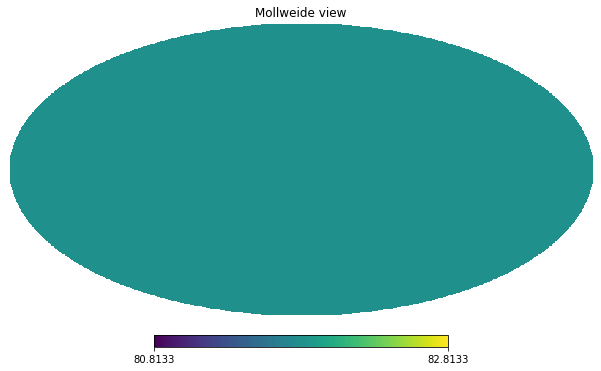

In [46]:
hp.mollview(sig_maps[1])

## from $\sigma$ to pixel realizations, add noise to signal and get $P = \sqrt{Q^2 + U^2}$

In [54]:
print('5_fre_noise_%03d.npy'%10)

5_fre_noise_010.npy


In [50]:
Nsamp = 100

for i in range(10):
    noise = np.random.randn(len(Sens_P_RJ), 3, npix)
    noise[:, 0, :] *= sigma_pix_I[:, None]
    noise[:, 1, :] *= sigma_pix_P[:, None]
    noise[:, 2, :] *= sigma_pix_P[:, None]
    np.save('/global/cscratch1/sd/jianyao/CBASS/Noise/homo_noise/5_fre_noise_%s_uK_RJ_%03d.npy'%(Nside, i), noise)
    
    total = maps_RJ + noise  ## add noise realization to signals (only synchrontron)
    total_QU = np.ones((len(fres), 12*Nside**2))
    for fre in range(len(fres)):

        total_QU[fre] = np.sqrt((total[fre][1])**2 + (total[fre][2])**2) 
        np.save('/global/cscratch1/sd/jianyao/CBASS/Observations/homo_noise/totalP_s0_%s_uK_RJ_%03d.npy'%(Nside,i), total_QU)
    

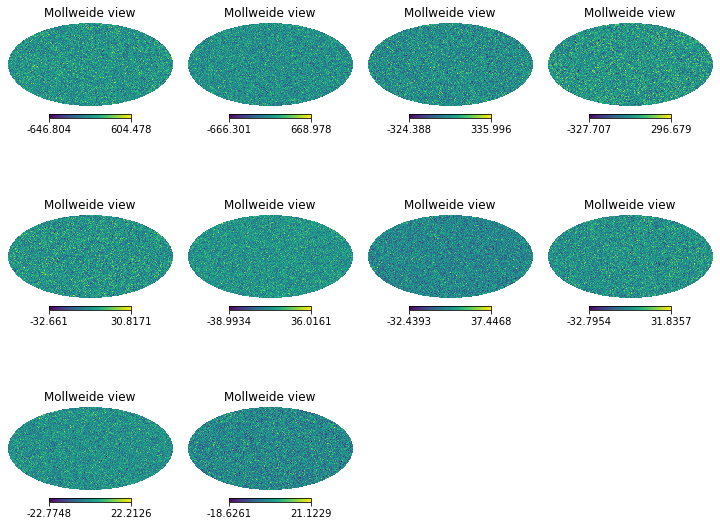

In [48]:
plt.figure(figsize = (10,8))
hp.mollview(noise[0][1], sub = (3,4,1))
hp.mollview(noise[0][2], sub = (3,4,2))

hp.mollview(noise[1][1], sub = (3,4,3))
hp.mollview(noise[1][2], sub = (3,4,4))

hp.mollview(noise[2][1], sub = (3,4,5))
hp.mollview(noise[2][2], sub = (3,4,6))

hp.mollview(noise[3][1], sub = (3,4,7))
hp.mollview(noise[3][2], sub = (3,4,8))

hp.mollview(noise[4][1], sub = (3,4,9))
hp.mollview(noise[4][2], sub = (3,4,10))

# Power spectrum of noise and signal

In [4]:
noise_CMB = np.load('/global/cscratch1/sd/jianyao/CBASS/Noise/homo_noise/5_fre_noise_000.npy')
signal = np.load('/global/cscratch1/sd/jianyao/CBASS/Foreground/5_fre_d0s0_128_uK_CMB.npy') # synchrotron + dust

In [5]:
noise_CMB.shape

(5, 3, 196608)

In [6]:
signal.shape

(5, 3, 196608)

In [7]:
nl = hp.anafast(noise_CMB[0])
cl = hp.anafast(signal[0])

In [ ]:
ell = np.arange(len(nl))